In [9]:
from pynance.base import TradingStrategy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# class MLStrategy(TradingStrategy):

#     def __init__(self, data, period, interval, lags):
#         super().__init__(data, period, interval)

#         # Amount of time lag to pass to the model
#         self.lags = lags


#     # def train_model(self, model):

#     #     """
#     #     Train a machine learning model using lagged log returns as features.

#     #     Returns:
#     #     - model : Trained model.
#     #     """

#     #     # Turn all the lag columns into a numpy array of shape (n_samples, lags)
#     #     self.X =  self.data[[f'Lag {lag}' for lag in range(1, self.lags + 1)]].values

#     #     # Extract the returns as the targey variable
#     #     self.y = self.data['Log Returns']

#     #     # Fit the model to the data
#     #     model.fit(self.X, self.y)

#     #     # Return the trained model
#     #     return model

#     def train_model(self, model, train=0.7):

#         """
#         Performs walk-forward validation to simulate live trading.

#         Parameters:
#         - model: Any sklearn-like model with fit/predict methods.
#         - train_size (int): Initial number of observations to train on.

#         Populates:
#         - self.data['Predicted Returns']: One-step-ahead predicted returns.
#         """

#         predictions = []
#         true_returns = []

#         train_size = int(len(self.data) * train)
#         print(train_size)

#         for i in range(train_size, len(self.data)):
#             # Slice up to current day for training
#             X_train = self.data[[f"Lag {lag}" for lag in range(1, self.lags + 1)]].iloc[i - train_size:i].values
#             y_train = self.data['Log Returns'].iloc[i - train_size:i].values

#             # Train model
#             model.fit(X_train, y_train)

#             # Predict 1 day ahead
#             X_test = self.data[[f"Lag {lag} in" for lag in range(1, self.lags + 1)]].iloc[i].reshape(1, -1)
#             pred = model.predict(X_test)[0]

#             predictions.append(pred)
#             true_returns.append(self.data['Log Returns'].iloc[i])

#         # Align predicted data with the time series. 
#         self.data = self.data.iloc[train_size:].copy()
#         self.data['Predicted Returns'] = predictions
#         self.data['Position'] = np.sign(self.data['Predicted Returns'])

       
    
#     def _generate_signals(self):

#         """Abstract method to generate trading signals. Should be implemented by subclasses."""

#         return NotImplementedError

2511


/home/tm1724/Algorithmic-Trading/PyNance/pynance/ml/ml_base.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data['Predicted Log Returns'] = predictions
/home/tm1724/Algorithmic-Trading/PyNance/pynance/base.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data["Log Returns"] = np.log(
/home/tm1724/Algorithmic-Trading/PyNance/pynance/base.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

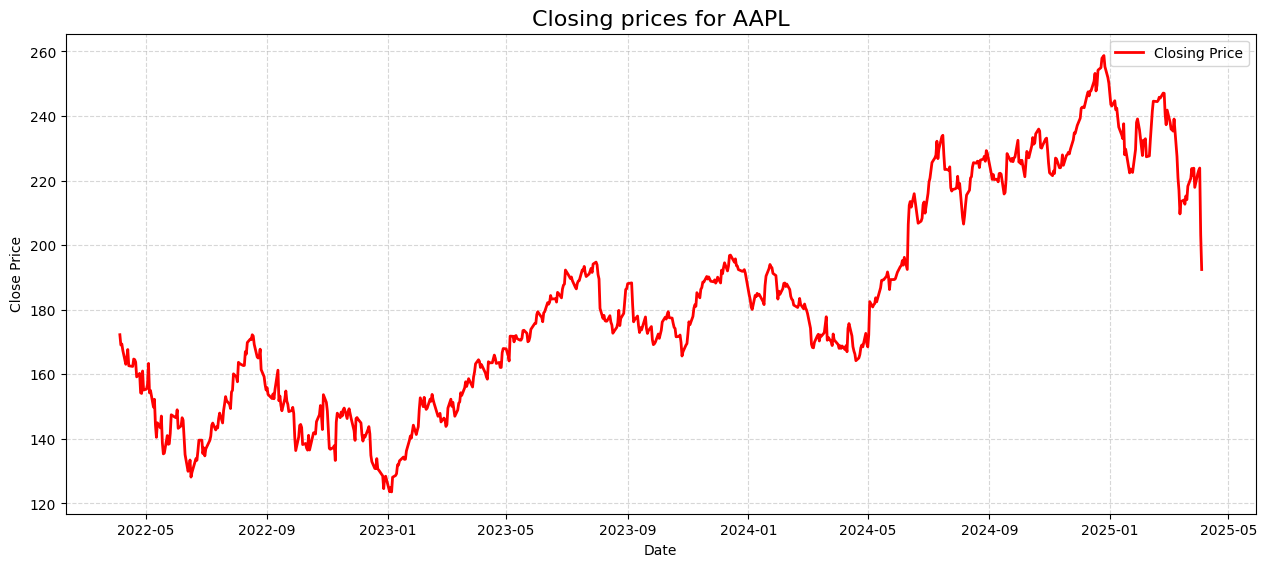

Metric                   Value
----------------------------------------
Percentage Return        204.23%
Win Rate                 62.50%
Average Gain             1.3048%
Average Loss             -0.8541%
Profit Factor            0.72
Sharpe Ratio             1.49
Volatility (Ann)         7.31%
Max Drawdown             8.18%
Trade Count              225


/home/tm1724/Algorithmic-Trading/PyNance/pynance/base.py:133: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


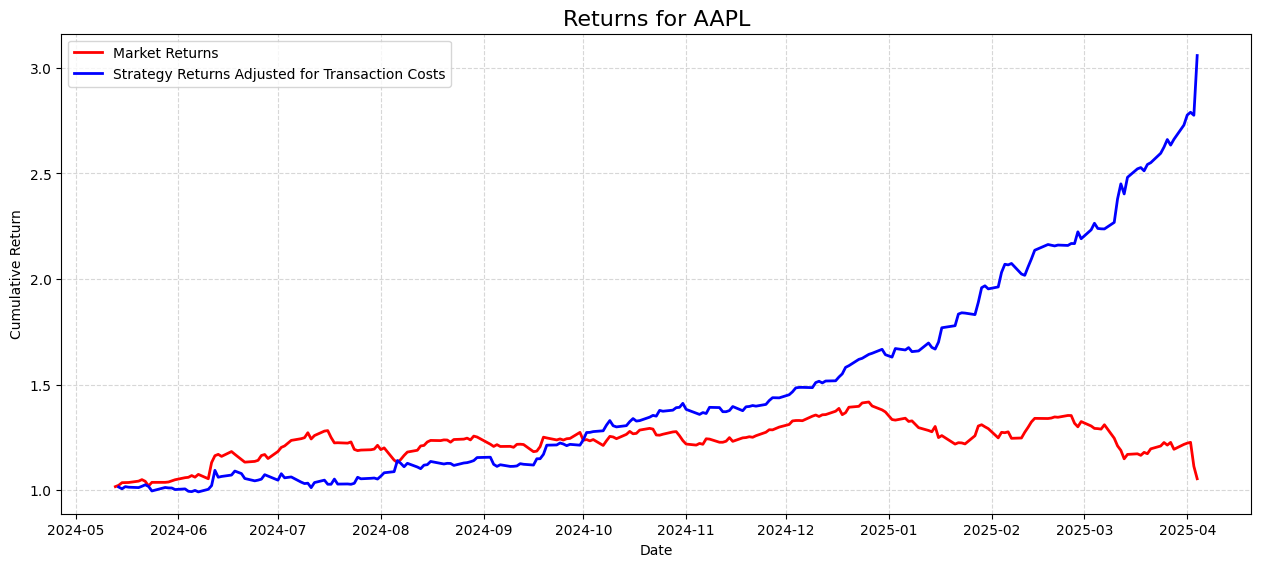

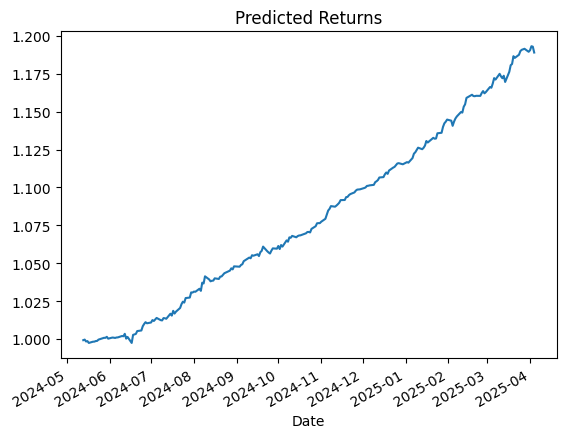

In [10]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from pynance.ml import LRStrategy
import matplotlib.pyplot as plt

# --- 1. Get Historical Data ---
ticker = 'AAPL'
period = '10y'
interval = '1d'
data = yf.Ticker(ticker).history(period=period, interval=interval)
lags = 5
transaction_cost = 0.001

# Test
model = LinearRegression()
strat = LRStrategy(data, period, interval, lags)
print(len(data))
strat.plot_close(f"Closing prices for {ticker}")
strat.train_model(model)
strat.back_test(transaction_cost)
strat.plot_returns(f'Returns for {ticker}')

strat.data

strat.data['Predicted Log Returns'].cumsum().apply(np.exp).plot(title="Predicted Returns")
plt.show()


